## Task3: Analysis of Covid19_tweets Dataset,
## Submitted BY : Trashi Singh
## Assigned by : DataInfoSec
### These tweets are collected using Twitter API and a Python script, analysis is on the basis of Top 50 words , Frequency of users tweeting Frequency of locations tweeting, Freequency of source tweeting.

### Importing libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid=pd.read_csv('covid19_tweets.csv')

In [3]:
covid.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,26-05-2017 05:46,624,950,18775,False,25-07-2020 12:27,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",16-04-2009 20:06,2253,1677,24,True,25-07-2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,28-02-2009 18:57,9275,9525,7254,False,25-07-2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,07-03-2019 01:45,197,987,1488,False,25-07-2020 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,12-02-2017 06:45,101009,168,101,False,25-07-2020 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
covid.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [6]:
covid.shape

(179108, 13)

<h3>Plot Missing Values

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes=True)
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()
     
return_missing_values(covid)

source              0.000430
user_description    0.057429
user_location       0.205301
hashtags            0.286609
dtype: float64

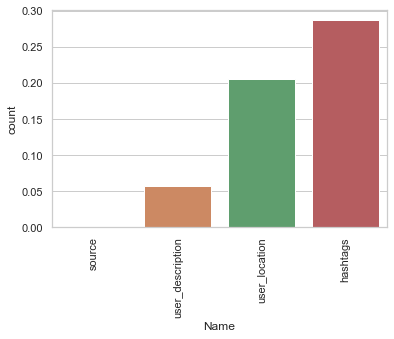

In [9]:
plot_missing_values(covid)

<AxesSubplot:>

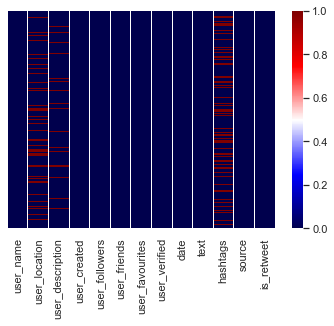

In [10]:
# heatmap representation of missing values

# plasma,visdir

sns.heatmap(covid.isnull(), cbar=True, yticklabels=False, cmap='seismic')

<h3>Frequency of users tweeting about Corona

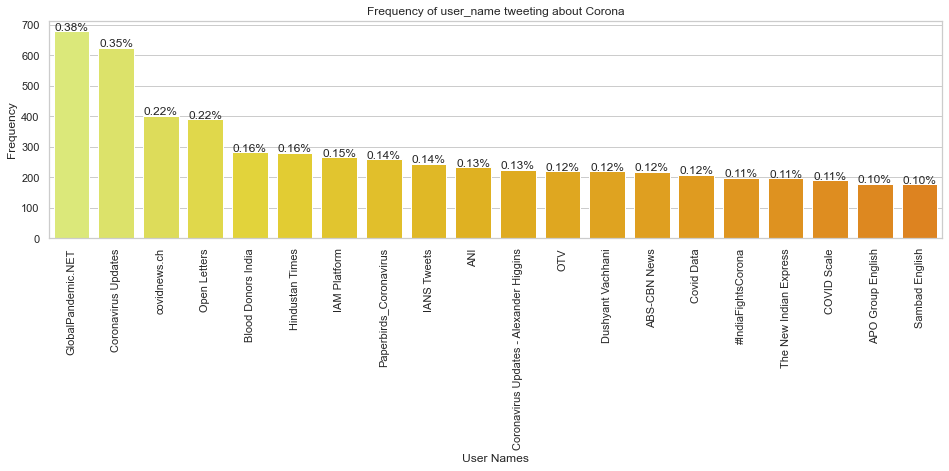

In [11]:
def plot_frequency_charts(covid, feature, title, pallete):
    freq_covid = pd.DataFrame()
    freq_covid[feature] = covid[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(covid))
    g = sns.countplot(covid[feature], order = covid[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    
plot_frequency_charts(covid, 'user_name', 'User Names','Wistia')

<h3>Frequency of locations tweeting about Corona

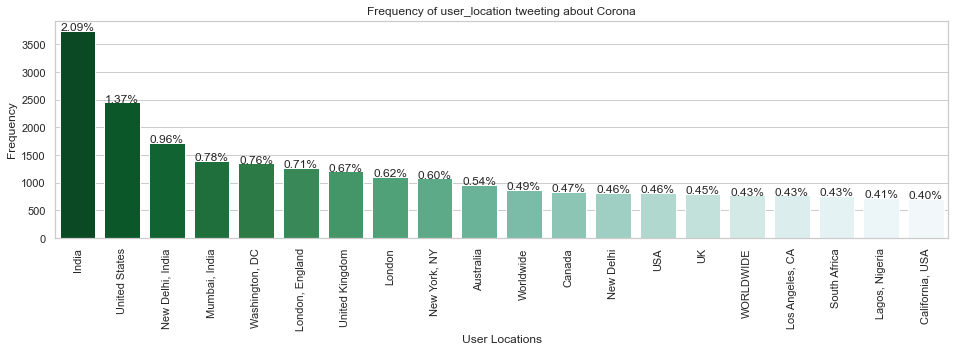

In [12]:
plot_frequency_charts(covid, 'user_location', 'User Locations', 'BuGn_r')

<h3>Frequency of sources tweeting about Corona

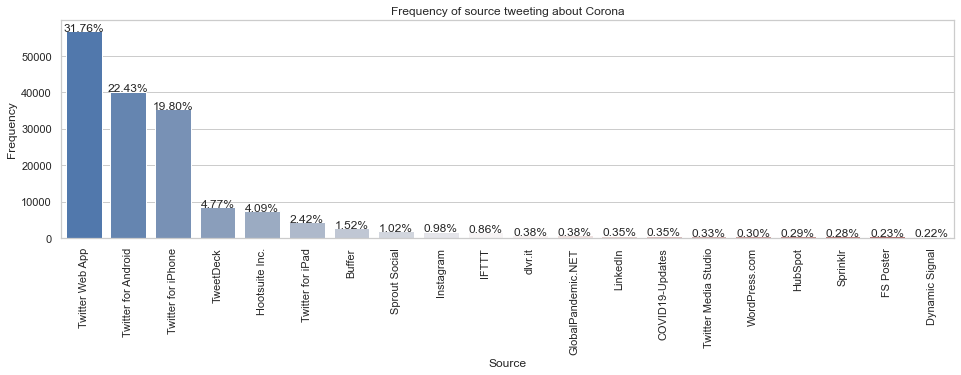

In [13]:
plot_frequency_charts(covid, 'source','Source', 'vlag')

<h3>Visualizing top 50 words location wise

In [14]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Trashi
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

["you've", "you'll", "you'd", 'your', 'yours']


In [16]:
from collections import Counter

def draw_bar_graph_for_text_visualization(df, location):
    tweets_from_loc = covid.loc[covid.user_location==location]
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'count'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='count', 
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Prevelant Words in {}".format(location))
    plt.xticks(rotation='vertical');
    

In [17]:
from string import punctuation


In [21]:
from wordcloud import WordCloud, STOPWORDS


In [22]:
def draw_word_cloud(covid, location, title):
    loc_covid = covid.loc[covid.user_location==location]
    loc_covid.loc[:, 'text'] = loc_covid['text'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_covid['text']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

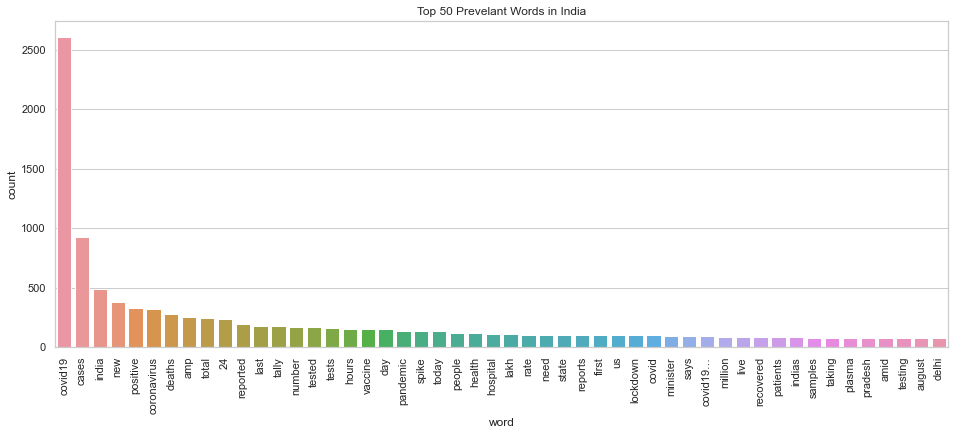

In [23]:
draw_bar_graph_for_text_visualization(covid, 'India')

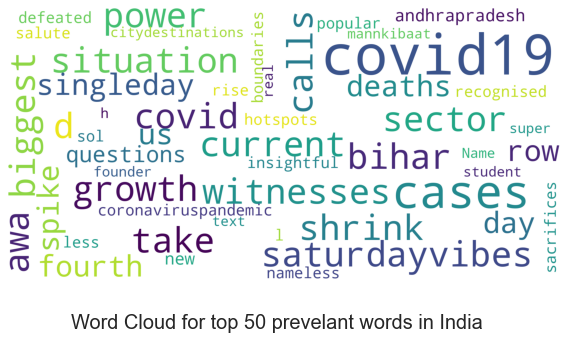

In [24]:
draw_word_cloud(covid, 'India', 'Word Cloud for top 50 prevelant words in India')

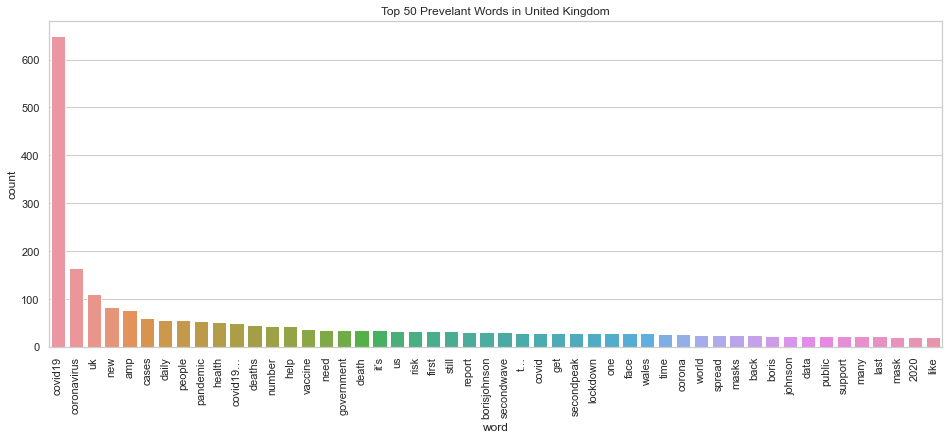

In [25]:
draw_bar_graph_for_text_visualization(covid, 'United Kingdom')

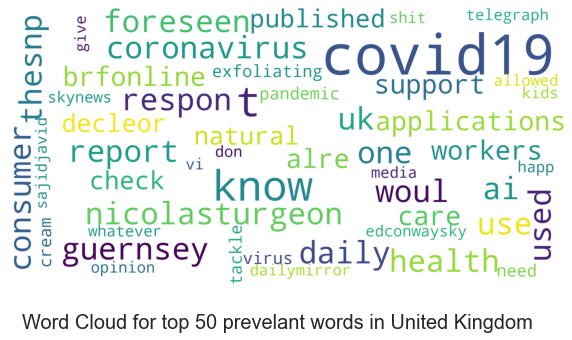

In [26]:
draw_word_cloud(covid, 'United Kingdom', 'Word Cloud for top 50 prevelant words in United Kingdom')

<h2>We can find top 50 prevelant word of any country(locationwise) by using same line of code(given above)

<h2>Thank You